In [11]:
import numpy as np
import matplotlib.pyplot as plt
from edibles.utils.edibles_oracle import EdiblesOracle
from edibles.utils.edibles_spectrum import EdiblesSpectrum
from edibles.utils.ContinuumFitter import ContinuumFitter
from stackingFunctions import widthNormLinStacker

In [12]:
pythia = EdiblesOracle()
starName = 'HD 183143'
minWave = 4000
maxWave = 4200
rawList = pythia.getFilteredObsList(object = [starName], MergedOnly = True, WaveMin = minWave, WaveMax = maxWave)
fnames = rawList.tolist()

E:\college\mitacs\ediblesDataDR4
***Common Objects***
['HD 183143']
**Filtered File List**
18814    /HD183143/BLUE_437/HD183143_w437_n1_20180907_B...
18836    /HD183143/BLUE_437/HD183143_w437_n2_20180912_B...
Name: Filename, dtype: object
2


In [13]:
datasRaw = np.empty(shape = len(fnames), dtype = object)

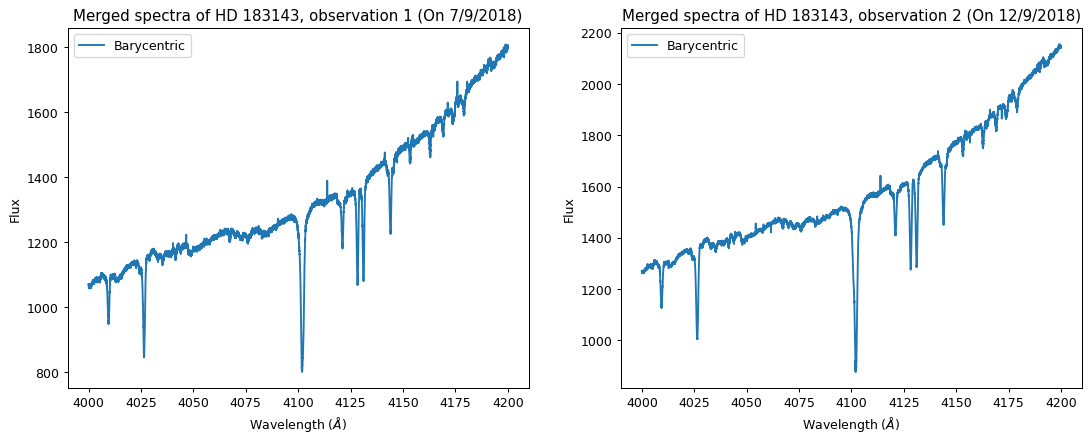

In [14]:
ffig1, faxs1 = plt.subplots(-((-len(fnames))//2), 2, figsize=(12,-5*((-len(fnames))//2)))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it1, file in enumerate(fnames):
    sp = EdiblesSpectrum(file)
    sp.getSpectrum(xmin = minWave, xmax = maxWave)
    datasRaw[it1] = np.array([sp.bary_wave, sp.bary_flux]).transpose()
    
    if(len(fnames) < 3):
        desax1 = faxs1[it1]
    else:
        desax1 = faxs1[it1//2, it1 - 2 * (it1//2)]
    
    desax1.plot(sp.bary_wave, sp.bary_flux, label="Barycentric")
    tit1 = 'Merged spectra of ' + starName + ', observation ' + str(it1+1) + ' (On ' + str(sp.datetime.day) + '/' + str(sp.datetime.month) + '/' + str(sp.datetime.year) + ')'
    desax1.set_title(tit1)
    desax1.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Flux')
    desax1.legend()

if not ((len(fnames) - 2 * (len(fnames)//2)) == 0):
    ffig1.delaxes(faxs1[len(fnames)//2, 1])

plt.subplots_adjust(hspace=0.3, wspace=0.2)

In [15]:
datas = datasRaw

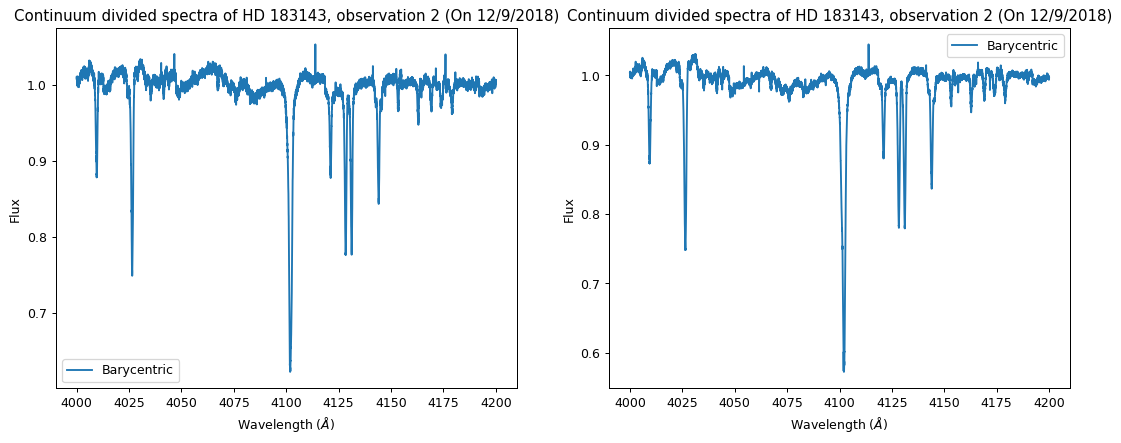

In [16]:
ffig2, faxs2 = plt.subplots(-((-len(datas))//2), 2, figsize=(12,-5*((-len(datas))//2)))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it2 in range(len(datas)):
    CF2 = ContinuumFitter(datasRaw[it2][:, 0], datasRaw[it2][:, 1])
    CS1, contPoints1  = CF2.SplineManualAnchor()
    datas[it2][:, 1] = datasRaw[it2][:, 1]/CS1(datasRaw[it2][:, 0])
    
    if(len(datas) < 3):
        desax2 = faxs2[it2]
    else:
        desax2 = faxs2[it2//2, it2 - 2 * (it2//2)]
    
    desax2.plot(datas[it2][:, 0], datas[it2][:, 1], label="Barycentric")
    tit2 = 'Continuum divided spectra of ' + starName + ', observation ' + str(it1+1) + ' (On ' + str(sp.datetime.day) + '/' + str(sp.datetime.month) + '/' + str(sp.datetime.year) + ')'
    desax2.set_title(tit2)
    desax2.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Flux')
    desax2.legend()

if not ((len(datas) - 2 * (len(datas)//2)) == 0):
    ffig2.delaxes(faxs2[len(datas)//2, 1])

plt.subplots_adjust(hspace=0.3, wspace=0.2)

In [17]:
perylene = np.loadtxt(r'C:\Users\hkhan\edibles\edibles\utils\Harshit\Lab Spectra Parameters\PeryleneParams.txt')
print(perylene)

[[4.02235681e+03 4.34036168e-01]
 [4.02505177e+03 3.26686765e-01]
 [4.03015492e+03 4.90781127e-01]
 [4.03349402e+03 4.69368559e-01]
 [4.03709484e+03 4.41464164e-01]
 [4.05552444e+03 4.99026296e-01]
 [4.05893434e+03 4.48412083e-01]
 [4.06265237e+03 4.50312024e-01]
 [4.07194068e+03 4.58866147e-01]
 [4.07561299e+03 4.37818883e-01]
 [4.07939020e+03 5.49952214e-01]
 [4.08304284e+03 4.19109290e-01]
 [4.08501216e+03 4.94871733e-01]
 [4.08819720e+03 4.97875484e-01]
 [4.09158174e+03 5.18710439e-01]
 [4.09528594e+03 5.18874714e-01]
 [4.09691136e+03 5.26495020e-01]
 [4.10370771e+03 1.17053680e+00]
 [4.12741027e+03 5.58102760e-01]
 [4.13102003e+03 4.76948755e-01]
 [4.13472908e+03 4.38845552e-01]
 [4.13890299e+03 4.93379602e-01]
 [4.14130893e+03 3.49239443e-01]
 [4.14440561e+03 4.54555236e-01]
 [4.14772121e+03 5.02699177e-01]
 [4.15125899e+03 5.51285273e-01]
 [4.15301500e+03 4.45475846e-01]
 [4.15517166e+03 5.73354943e-01]
 [4.15692542e+03 5.52295105e-01]
 [4.15997580e+03 1.02062269e+00]
 [4.163906

In [ ]:
#make code to give ranges for regions of avoidance and and insert them in stacker

Peak 3.0 - -3.9378823104060205 to 3.98720480272128
Peak 4.0 - -3.91960568092879 to 3.962801909836559
Peak 5.0 - -3.9911397592747853 to 3.9438588445003964
Peak 6.0 - -3.9514452879118904 to 3.987225478107053
Peak 7.0 - -3.9269624666900276 to 3.978213732844385
Peak 8.0 - -3.979464757716307 to 3.9526769601033087
Peak 9.0 - -3.953886815691683 to 3.9941497274755813
Peak 10.0 - -3.93838324662236 to 3.9891237537895567
Peak 11.0 - -3.988595437996702 to 3.932511858173409
Peak 12.0 - -3.981817533085535 to 3.9389728347886717
Peak 13.0 - -3.978777035054282 to 3.974562881287278
Peak 14.0 - -3.9914610659902943 to 3.950857952782328
Peak 15.0 - -3.9300908960648537 to 3.93262811530012
Peak 16.0 - -3.970119587786332 to 3.9307367143013017


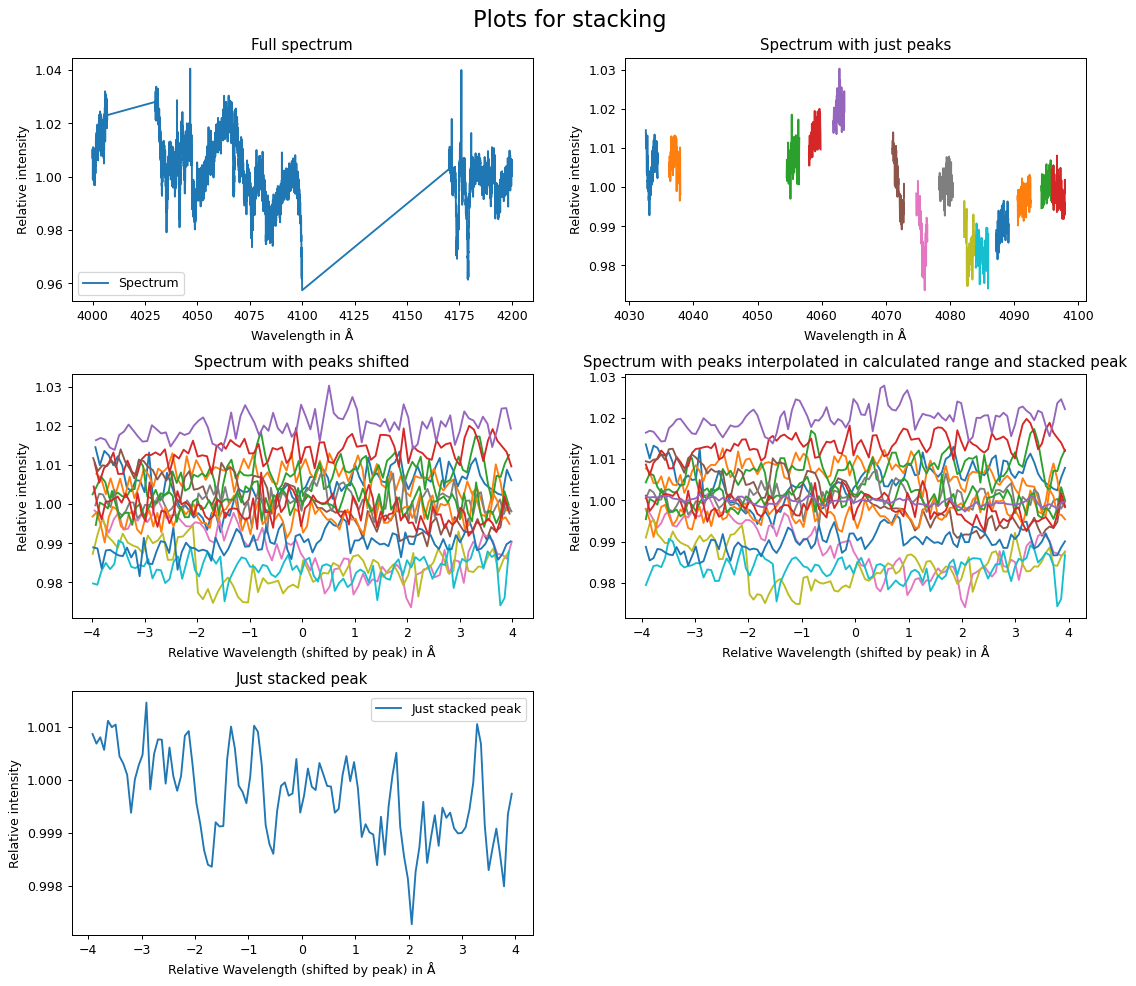

In [33]:
#print(datas[0].shape)
#print(np.logical_and(datas[:, 0] >= 4085, datas[:, 0] <= 4115).shape)
stackedData1 = widthNormLinStacker(np.delete(datas[0], 
                                             np.logical_or(np.logical_and(datas[0][:, 0] >= 4100, datas[0][:, 0] <= 4170),
                                                           np.logical_and(datas[0][:, 0] >= 4007, datas[0][:, 0] <= 4030))
                                             , 0), perylene)

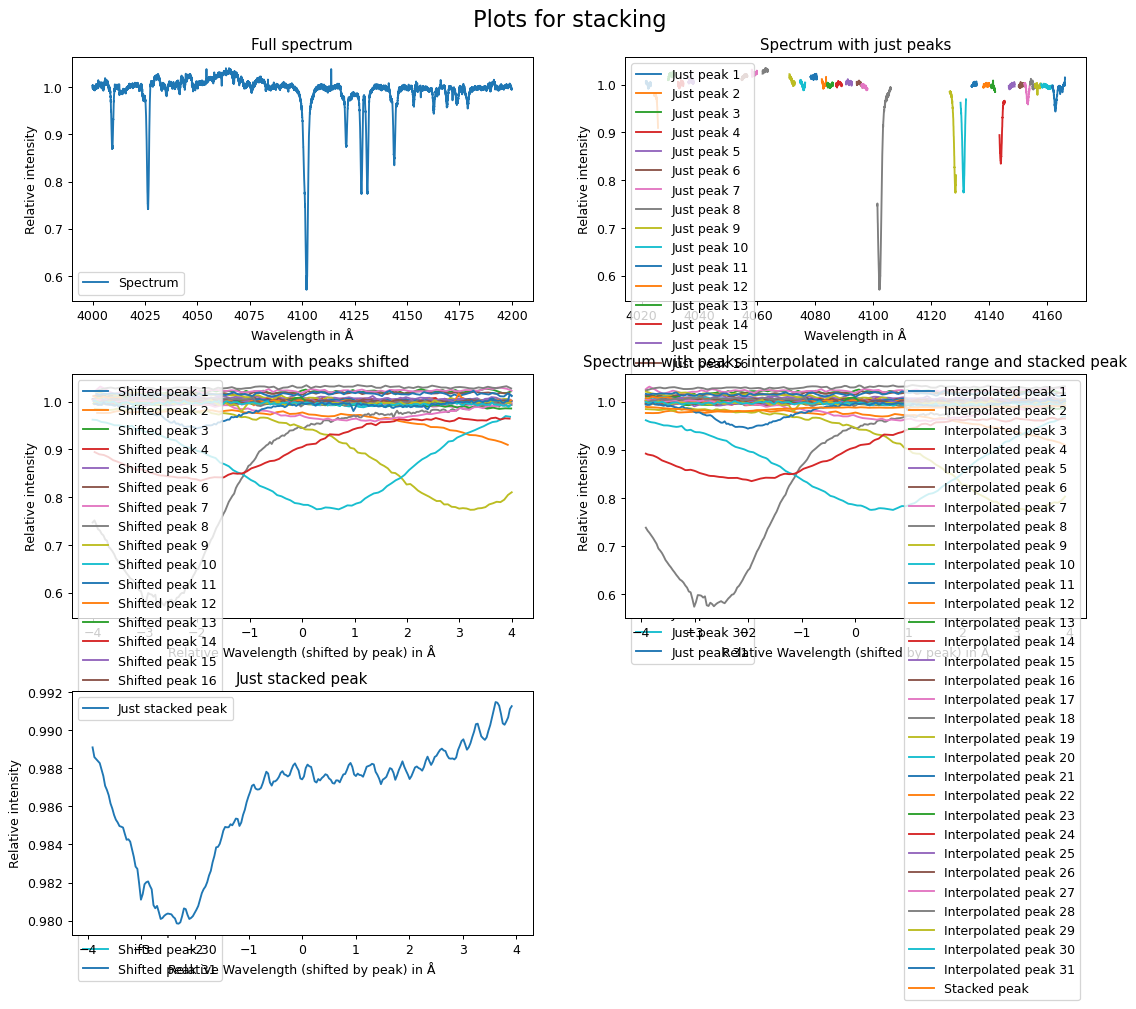

In [91]:
stackedData2 = widthNormLinStacker(datas[1], perylene)

In [ ]:
plt.plot(stacked)